<a href="https://colab.research.google.com/github/OliverOE1509/OliverOE1509/blob/main/Evolutionary_game_theory_applied_on_the_prisoners_dilemma_utilizing_dynamic_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evolutionary process of prisoner's dillema
## Introduction
Prisoner's dilemma is a game theory thought exmperiment that involves two agents who can either coproate, oftenly for a mutual benefit, or betray their partner by defect (testify). The classic prisoner dilemma involves one game of this experiment(Nash Equilbrium is often at the point where both agents defect - depends on punishment). However, in our project we introduce dynamic games, where the agents meet each other several times and pursues various strategies of whether to choose between corporating or defecting. The total accumulated punishment between the game determines the total punishment for each agent.

The drawback of the dynamic games is that underlying parameters makes it diffcult to establish an optimal strategy. If agents are more "short-term(lower discount factor)" in their view of thinking, then the punishment from the earlier round of games are more worth, thus, resulting in different optimal strategy compared to if agents are more "long-term(higher discount factor)" in their views. Therfore, by applying the settings to an evolutionary process we can study how various strategies evolve in terms of prefered choice of strategy by next generations of agents, based on the performance of earlier generations. We also introduce mutations for the process, where we allow a certain percentage of the new generation to be replaced by a "fresh" new generation that chose strategies independently from ealrier generations performance.


## Defining the arena

#### Importing packages
We begin by importing the packages neccessary for setting-up the environment where the agents face each other, we will use numpy for its data manipulation and handeling characteristics and matplotlib for visualisation of results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-2-66a077f50fee>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#### Game outcome - Creating the game
First step is to create the arena where the agents can meet each other. Since we use the prisoner's dilemma experiment, there are potentially four outcomes that are possible to end up at for the agents:

1. Agent 1 corporate & agent 2 corporate
2. Agent 1 defect & agent 2 corporate
3. Agent 1 corporate & agent 2 defect
4. Agent 1 defect & agent 2 defect

We set up this game through our game function defined below that takes the action from each agent, and then returns a numpy array that holds 4 elements, where each element is either equal to 1 or 0, and only one element can be 1 in total. The posistion of the elements reflects which out of the four outcomes the game ended with.

For example, if agent 1 corporates and agent 2 defects, the function returns; array([0, 0, 1, 0]).

In [ ]:
def game(action1, action2):
    """ Returns the outcome from a single game """
    return np.array([action1*action2, (1-action1)*action2, action1*(1-action2), (1-action1)*(1-action2)]).T

Secondly, we want the agents to play several games against each other. However, we want them to have the ability to make strategic choices based on earlier records of games, thus, we introduce a function for keeping track of the historical choices the player taken from ealier games betweeen each others

In [ ]:
def historyupdate(history,action1,action2):
    """ History tracker for a series of games between two players """
    if history==[]:
        history=[(action1,action2)]
    else:
        history.append((action1,action2))
    return history

Once we created the arena and have a method for keeping track of the actions from the earlier games, we can set up the dynamic games that takes the agents two strategies and allow them to use them against each other for a series of games, where the probability of a new game equates to $ \theta^{i} $, where $i$ represents the round number of rounds that has been played. That said, a larger theta allows for more games being played while a smaller theta forces players to focus on the total punishment of shorter rounds.

Note that the potential outcome for the two agents we are working with are the following:

$$
\begin{bmatrix}
 & Corporate & Defect
\\ Corporate & (1,1) & (3,0)
\\ Defect & (0,3) & (2,2)
\end{bmatrix}
$$

In [ ]:
def dynamic_game(strategy1, strategy2, theta):
    """
    Returns the array of what the game result is from each game, where each row represents a game.

    The outcomes of a row is descibed:

    (player 1 & 2 corporate, player 1 defect & player 2 corporate, player 1 coporate & player 2 defect, player 1 & 2 defects)

    PARAMETERS:
    -----------
    player1 = 1 or 0, 1 = corporate, 0 = defect
    player2 = 1 or 0, 1 = corporate, 0 = defect
    theta = Value between 0 and 1, reflects the discount rate of the payoffs.

    Note:
    -----
    Higher theta implies games ends earlier and thus are earlier games payoffs more valuable (less discounting) and vice versa
    __________________________________________________________________________________________________________________________
    """

    # The potential payoff grid (NOTE IT IS SYMMETRICAL!)
    # Player 1 potential payoffs
    payoff_p1 = np.array([[1],  # Both corporate (stays silent)
                          [0],  # Player 1 defect (testifies), player 2 corporate (stays silent)
                          [3],  # Player 1 corporate (stays silent), player 2 defect (testifies)
                          [2]]) # Both players defect (testifies)

    # Player 2 potential payoffs
    payoff_p2 = np.array([[1],  # Both corporate (stays silent)
                          [3],  # Player 1 defect (testifies), player 2 corporate (stays silent)
                          [0],  # Player 1 corporate (stays silent), player 2 defect (testifies)
                          [2]]) # Both players defect (testifies)



    flag = True # While flag is true -> game runs

    payoff1 = 0 # Tracker for total payoffs from all rounds (player 1)
    payoff2 = 0 # Tracker for total payoffs from all rounds (player 2)

    history = [] # Previous actions from earlier rounds

    while flag:
        action1 = strategy1(history) # Given history, the next move for player 1
        action2 = strategy2(history) # Given history, the next move for player 2

        outcome = game(action1, action2) # The next game played with outcomes

        payoff1 += outcome @ payoff_p1 # Add the payoff from each additional game (player 1)
        payoff2 += outcome @ payoff_p2 # Add the payoff from each additional game (player 2)

        history = historyupdate(history,action1,action2) # Update history

        if np.random.uniform() > theta: # The discount factor
            flag = False

    return payoff1[0], payoff2[0]


#### Defining Strategies
This section is dedicated space for defining strategies for the two agents. **Note** that it is important to define multiple of strategies when the stratgies incoprorate historical actions as such that the players do not base their next moves on their own historical one.

In [ ]:
# Remember to add new strategies to the list of strategies and update the
# list of players and their chosen strategy.
def always_corporate(history):
    return 1

def always_defect(history):
    return 0

def titfortat1(history):
    if history==[]:
        return 1
    else:
        lastround = history[-1] # Makes lastround the tuple of actions from last round.
        if lastround[1]==1: # Looks at the action of player 2 in last round.
            return 1
        else:
            return 0

def tattitfortat1(history):
    if history==[]:
        return 0
    else:
        lastround = history[-1] # Makes lastround the tuple of actions from last round.
        if lastround[1]==1: # Looks at the action of player 2 in last round.
            return 1
        else:
            return 0

def titfortat2(history):
    if history==[]:
        return 1
    else:
        lastround = history[-1] # Makes lastround the tuple of actions from last round.
        if lastround[0]==1: # Looks at the action of player 2 in last round.
            return 1
        else:
            return 0

def tattitfortat2(history):
    if history==[]:
        return 0
    else:
        lastround = history[-1] # Makes lastround the tuple of actions from last round.
        if lastround[0]==1: # Looks at the action of player 2 in last round.
            return 1
        else:
            return 0

Here we simply hold two lists for the strategies defined that the agents can choose from once generated.

In [ ]:
# List holding possible choices of strategies
strategies1 = [always_defect, always_corporate, titfortat1, tattitfortat1]
strategies2 = [always_defect, always_corporate, titfortat2, tattitfortat2]

### Defining the Evolution Process

In [ ]:
def mydraw(payoffs, p):
    """ Source: Professor Christian Brinch, BI Norwegian Business School """
    # THIS IS SUPPOSED TO BE A BLACK BOX
    # DRAWS 1000 indices with a probabilities proportional to payoffs in previous periods
    mysum=np.sum(payoffs)
    scaledpayoffs = payoffs/mysum
    cumscaledpayoffs = np.cumsum(scaledpayoffs)
    draw = np.random.uniform(size=p)
    draw = np.sort(draw) # not really necessary
    indices = np.full(p,0,dtype=int)
    for i in range(p):
        indices = indices + (draw>cumscaledpayoffs[i])
    return indices

In [ ]:
def evolutionary_process(n_players, n_evolutions, theta, ordinary_strategy, include_mutation=False, mutation_strategy=None, starting_distribution=None):
    """
    Returns the result of how many agents choosed a specific strategy for each evolution.

    -----------
    PARAMETERS:
    -----------
    n_players - Total number of players for each population (int)

    n_evolutions - Total number of evolutions to go through (int)

    theta - The discount factor for the total punishment of the dynamic games (float: 0-1)

    ordinary_strategy - A list of possible choices for the first generation of agents to choose between (list)

    include_mutatation - Set to the percentage value that you would like mutations to be, False by default (float: 0-1)

    mutation_strategy - A list of which strategies the mutations can chose between (list)

    starting_distribution - A list of the distribution for each choice to start from, Uniform by default (list)


    --------
    EXAMPLE:
    --------
    >>> evolutionary_process(1000, 200, 0.5, [0, 1, 2, 3], include_mutations=0.01, mutation_strategy=[0, 3], starting_distribution=[0.1, 0.2, 0.4, 0.3])
    array([evolution1, evolution2, ...]), array([always_defect1, always_defect2, ...]), array([always_corporate1, always_corporate2, ...])
    array([titfortat1, titfortat2, ...]), array([(tat)titfortat1, (tat)titfortat2, ...])


    """

    # Generating 1000 players who select one strategy
    # A strategy is represented by an integer
    # For example, if player i pursue strategy x, where x is between 0 and n, then
    # using the dynamic_game function -> dynamic_game(strategies[i], stratgies[j], theta=y)
    half_n_players = int(n_players/2)
    players = np.random.choice(ordinary_strategy, size=n_players, p=starting_distribution)

    evolutions = range(n_evolutions) # Each evolution id

    # Data tracking
    always_corporate = np.zeros(n_evolutions)
    always_defect = np.zeros(n_evolutions)
    titfortat = np.zeros(n_evolutions)
    tattitfortat = np.zeros(n_evolutions)
    evolution = np.zeros(n_evolutions)

    for evolve in evolutions:

        # Randomize and split groups once:
        # Two groups of players - this is for ensuring that a player do not meet itself
        a = np.random.uniform(size=n_players)
        b = np.argsort(a)
        players = players[b]
        if include_mutation != False:
            players[int((1-include_mutation)*n_players):n_players]=np.random.choice(mutation_strategy, size=int(include_mutation*n_players)) # Put in the new mutations here. (1%)
        group1 = players[:half_n_players]
        group2 = players[half_n_players:]

        # cont. Data tracking
        tattitfortat[evolve] = sum((players==3))
        titfortat[evolve] = sum((players==2))
        always_corporate[evolve] = sum((players==1))
        always_defect[evolve] = sum((players==0))
        evolution[evolve] = evolve

        # Tracking the payoffs for each match
        position_tracker = 0
        player_punish_a = np.zeros(shape=half_n_players, dtype=int)
        player_punish_b = np.zeros(shape=half_n_players, dtype=int)


        # Run the game between all matches
        for player_i, player_j in zip(group1, group2):
            # Add the payoffs for a series of games between a match
            player_punish_a[position_tracker], player_punish_b[position_tracker] = dynamic_game(strategies1[player_i], strategies2[player_j], theta=theta)
            position_tracker += 1 # After adding, update the position for the payoff register


        # Add the player payoffs back to a complete function
        player_punish = np.hstack((player_punish_a, player_punish_b))

        # Reverse the punishment into opportunity payoffs
        player_payoffs = max(player_punish) + 1 - player_punish

        # Grab index of proportional best performers
        index = mydraw(player_payoffs, n_players)

        # Generate next evolution through propegating based on previous best performers
        players = players[index]


    return evolution, always_defect, always_corporate, titfortat, tattitfortat

### Experimenting
#### Evolutionary Process (Exc. Mutation)
###### Always defect versus always corporate

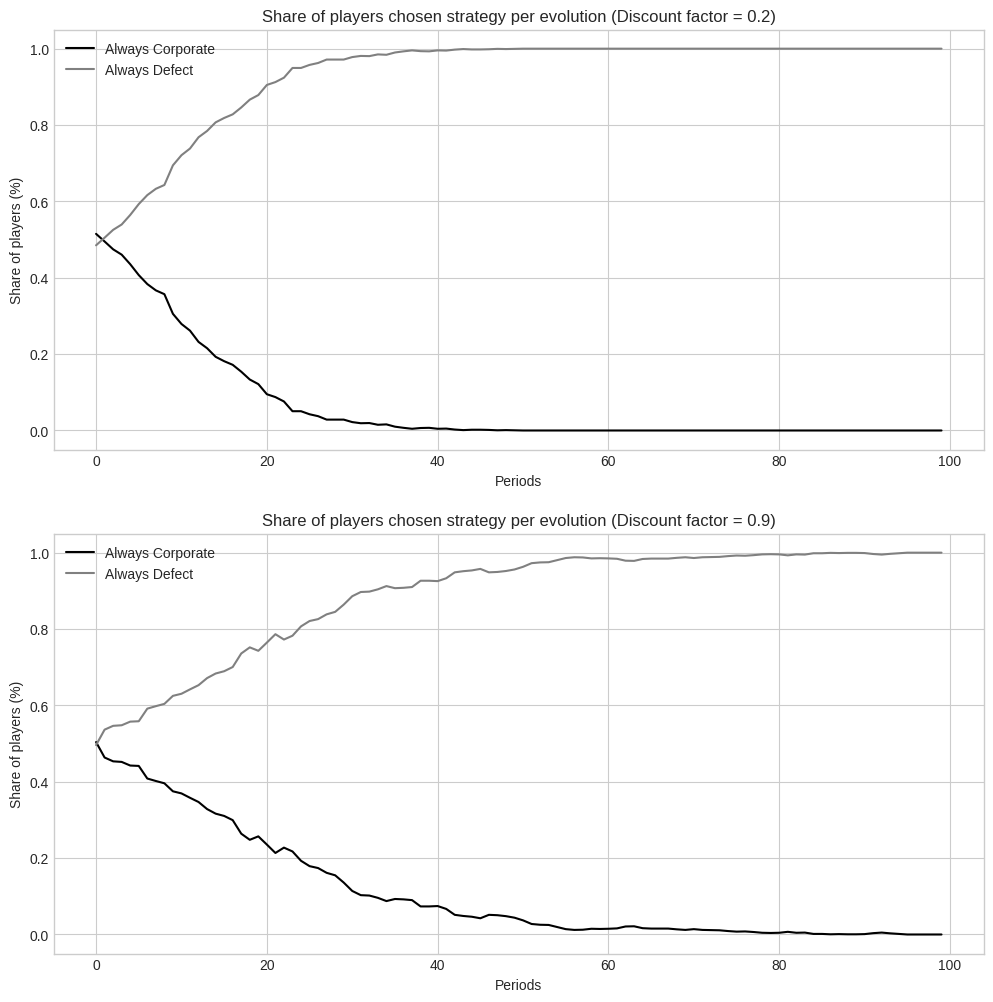

In [34]:
evolutions, AD1, AC1, TFT, TTFT = evolutionary_process(2000, 100, 0.2, [0,1])
evolutions, AD2, AC2, TFT, TTFT = evolutionary_process(2000, 100, 0.9, [0,1])


# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.2)")
plt.plot(evolutions, AC1/2000, label="Always Corporate", color = "black")
plt.plot(evolutions, AD1/2000, label="Always Defect", color = "gray")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.9)")
plt.plot(evolutions, AC2/2000, label="Always Corporate", color = "black")
plt.plot(evolutions, AD2/2000, label="Always Defect", color = "gray")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()


###### Comment:
Given there are only two strategies - always defect & always Corporate - 100% of the population will converge towards the always defect choice, no matter if theta is low or high.

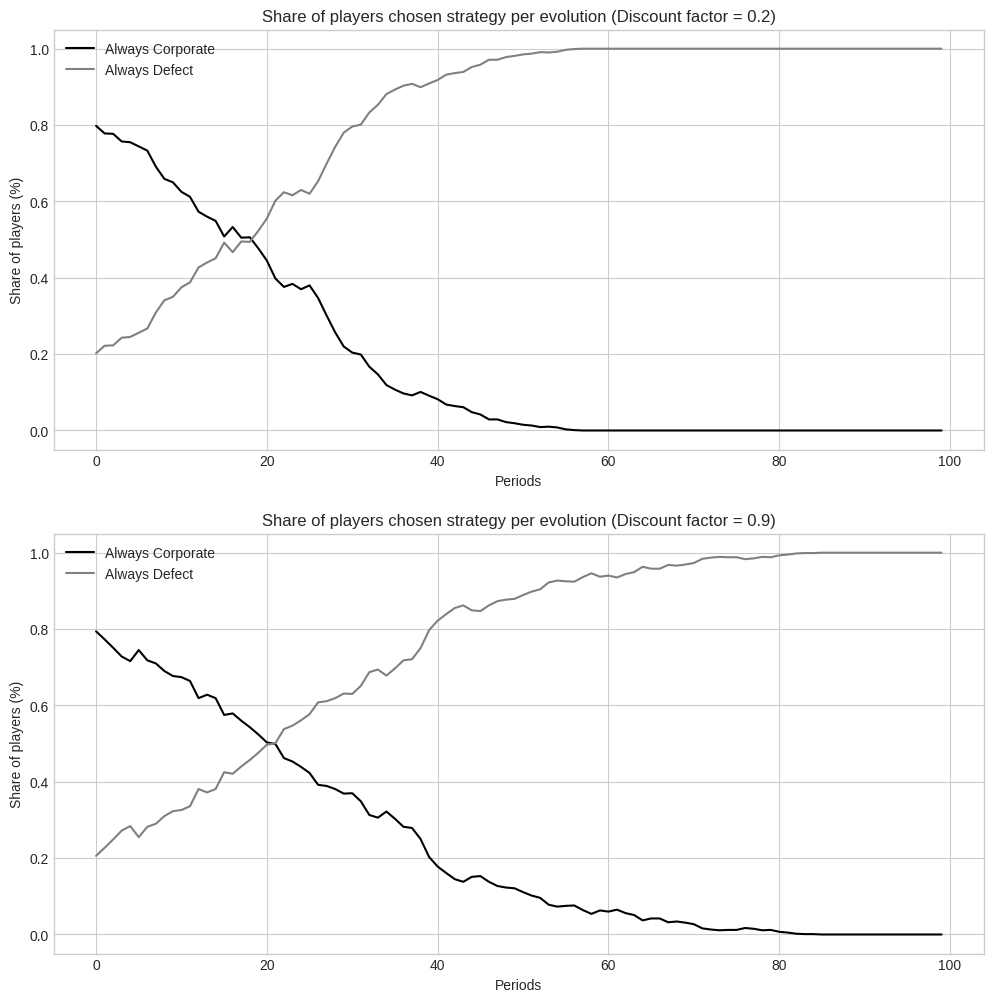

In [35]:
evolutions, AD1, AC1, TFT, TTFT = evolutionary_process(1000, 100, 0.2, [0,1], starting_distribution=[0.2, 0.8])
evolutions, AD2, AC2, TFT, TTFT = evolutionary_process(1000, 100, 0.9, [0,1], starting_distribution=[0.2, 0.8])


# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.2)")
plt.plot(evolutions, AC1/1000, label="Always Corporate", color = "black")
plt.plot(evolutions, AD1/1000, label="Always Defect", color = "gray")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.9)")
plt.plot(evolutions, AC2/1000, label="Always Corporate", color = "black")
plt.plot(evolutions, AD2/1000, label="Always Defect", color = "gray")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

###### Comment:
If we change the probability of choosing either always defect or always corporate for both the thetas, we still will observe a coverging trend in the population torwards prefering the always defect strategy. Thus, given a scenario where only these two strategies are an option, the classic Nash equilibrium of the prisoner's dilemma holds true and both agents will be uncomfortable of deviating from defecting given the additional risk they become subject towards.


___
###### Introducing Tit-for-Tat strategy

0.005514770124000002 0.022374369324000002 0.04498216680000001


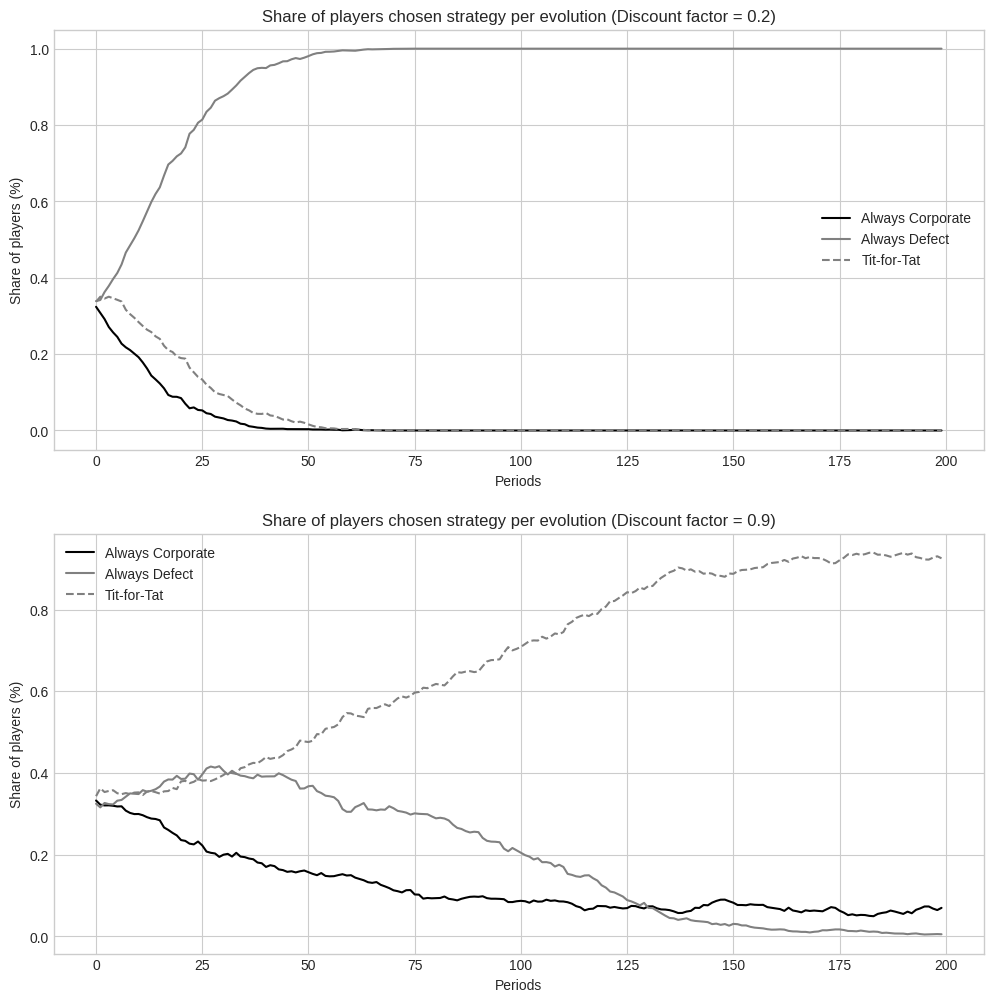

In [36]:
n_players = 5000
evolutions, AD1, AC1, TFT1, TTFT = evolutionary_process(n_players, 200, 0.2, [0,1,2])
evolutions, AD2, AC2, TFT2, TTFT = evolutionary_process(n_players, 200, 0.9, [0,1,2])

print(np.var(AC2/n_players),  np.var(AD2/n_players), np.var(TFT2/n_players))

# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.2)")
plt.plot(evolutions, AC1/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD1/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT1/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.9)")
plt.plot(evolutions, AC2/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD2/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT2/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

0.06241809749999999 0.027368239999999995 0.1227403975


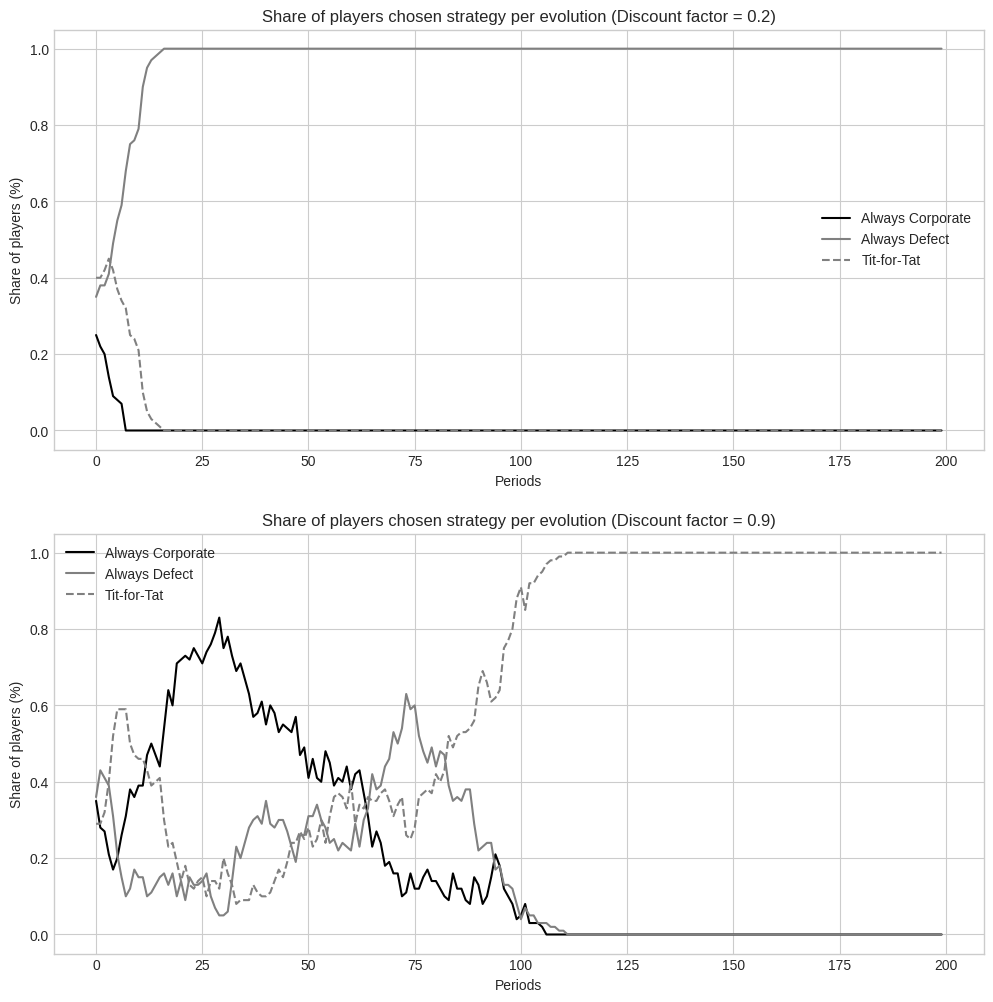

In [37]:
n_players = 100
evolutions, AD1, AC1, TFT1, TTFT = evolutionary_process(n_players, 200, 0.2, [0,1,2])
evolutions, AD2, AC2, TFT2, TTFT = evolutionary_process(n_players, 200, 0.9, [0,1,2])

print(np.var(AC2/n_players),  np.var(AD2/n_players), np.var(TFT2/n_players))

# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.2)")
plt.plot(evolutions, AC1/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD1/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT1/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.9)")
plt.plot(evolutions, AC2/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD2/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT2/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

###### Comment:
Once introducing the option for the "Tit-for-Tat" strategy, we note that the discount factor, theta, has an effect on the result. When theta is higher(0.9), there seem to be more likely for the dominating strategy to be the "Tit-for-Tat" strategy. However, for a lower theta(0.2), "Always defect" is the more prefered choice due to that the probabilty for the game ending earlier increases and thus are wins more valuable in the short-run.

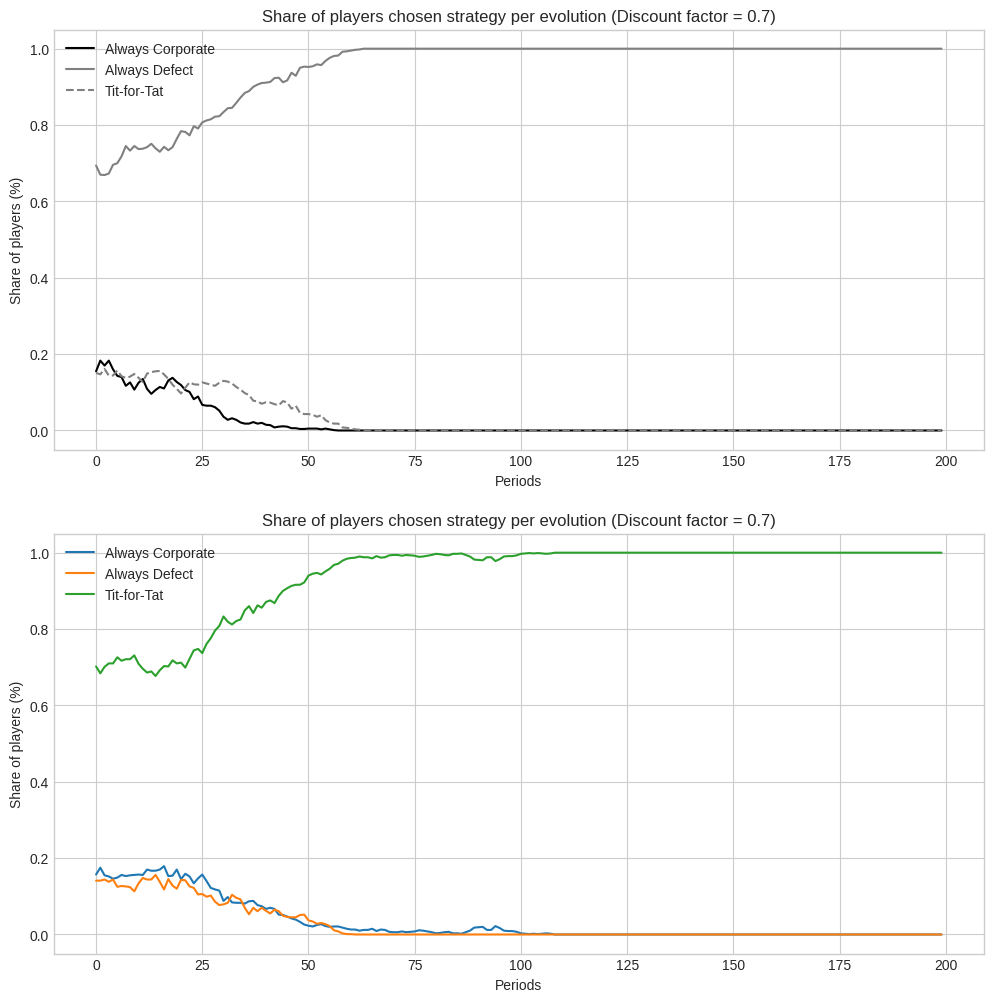

In [38]:
n_players = 1000
evolutions, AD1, AC1, TFT1, TTFT = evolutionary_process(n_players, 200, 0.7, [0,1,2], starting_distribution=[0.7, 0.15, 0.15])
evolutions, AD2, AC2, TFT2, TTFT = evolutionary_process(n_players, 200, 0.7, [0,1,2], starting_distribution=[0.15, 0.15, 0.7])


# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.7)")
plt.plot(evolutions, AC1/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD1/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT1/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.7)")
plt.plot(evolutions, AC2/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD2/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT2/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

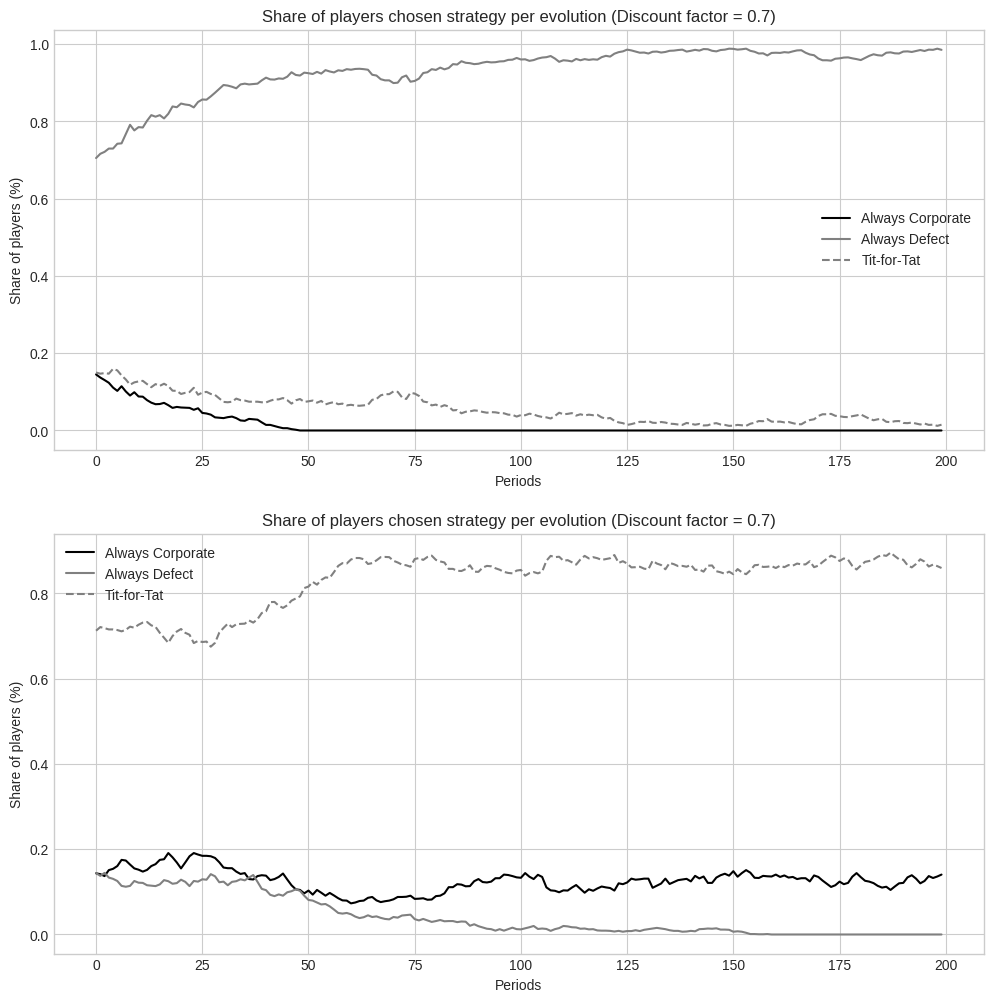

In [39]:
n_players = 2000
evolutions, AD1, AC1, TFT1, TTFT = evolutionary_process(n_players, 200, 0.7, [0,1,2], starting_distribution=[0.7, 0.15, 0.15])
evolutions, AD2, AC2, TFT2, TTFT = evolutionary_process(n_players, 200, 0.7, [0,1,2], starting_distribution=[0.15, 0.15, 0.7])


# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.7)")
plt.plot(evolutions, AC1/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD1/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT1/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.7)")
plt.plot(evolutions, AC2/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD2/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT2/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

###### Comment:
When we introduce an uneven distribution of prefered starting strategy for the first population, we note a siginficant difference in the final evolution of which strategy would end up as the dominating one.

___
###### Introducing (Tat)Tit-for-Tat

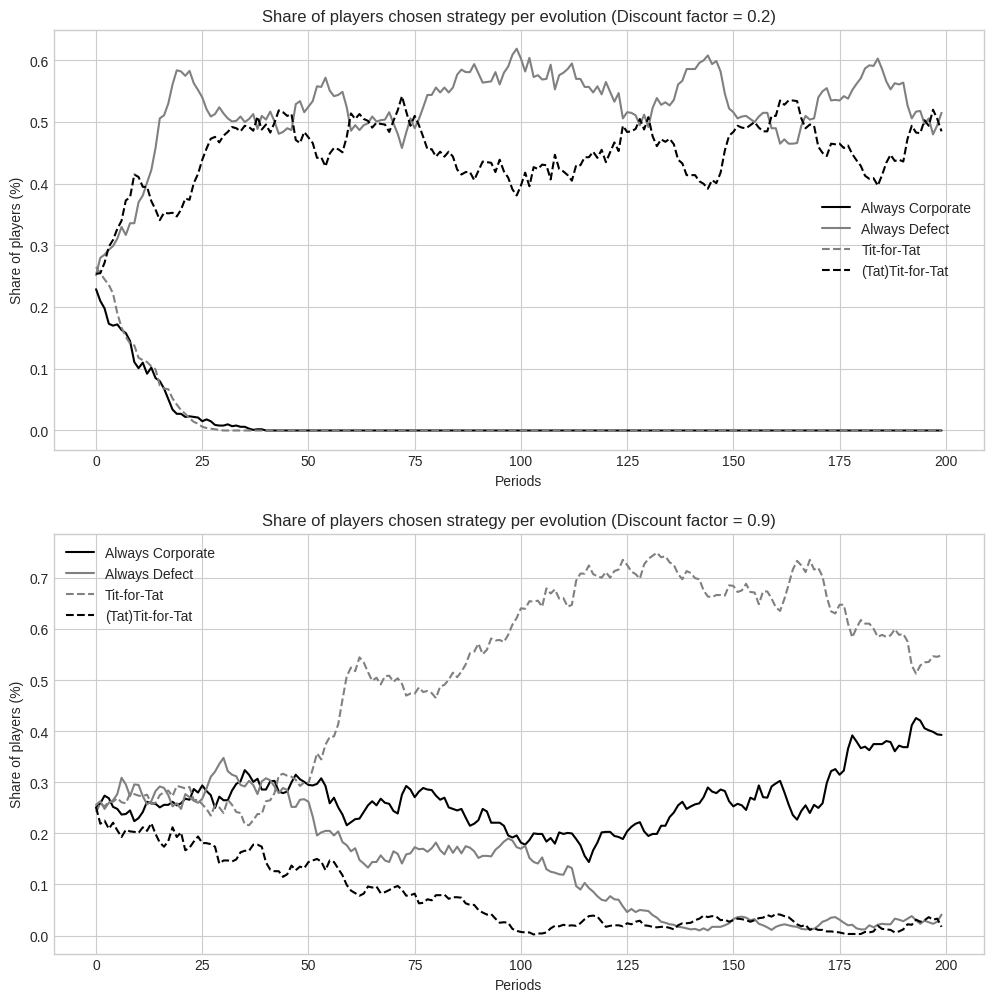

In [40]:
n_players = 1000
evolutions, AD1, AC1, TFT1, TTFT1 = evolutionary_process(n_players, 200, 0.2, [0,1,2,3])
evolutions, AD2, AC2, TFT2, TTFT2 = evolutionary_process(n_players, 200, 0.9, [0,1,2,3])


# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.2)")
plt.plot(evolutions, AC1/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD1/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT1/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.plot(evolutions, TTFT1/n_players, label="(Tat)Tit-for-Tat", color = "black", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.9)")
plt.plot(evolutions, AC2/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD2/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT2/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.plot(evolutions, TTFT2/n_players, label="(Tat)Tit-for-Tat", color = "black", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

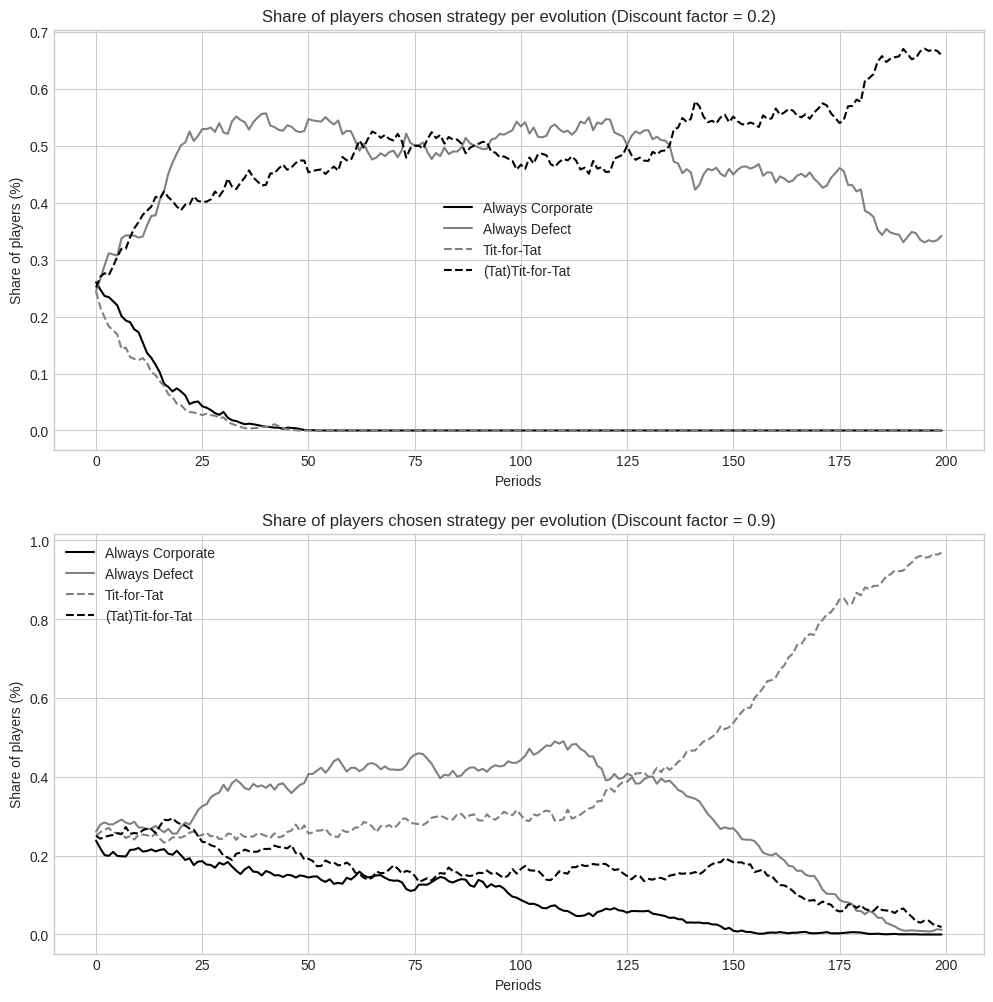

In [41]:
n_players = 2000
evolutions, AD1, AC1, TFT1, TTFT1 = evolutionary_process(n_players, 200, 0.2, [0,1,2,3])
evolutions, AD2, AC2, TFT2, TTFT2 = evolutionary_process(n_players, 200, 0.9, [0,1,2,3])


# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.2)")
plt.plot(evolutions, AC1/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD1/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT1/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.plot(evolutions, TTFT1/n_players, label="(Tat)Tit-for-Tat", color = "black", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.9)")
plt.plot(evolutions, AC2/n_players, label="Always Corporate", color = "black")
plt.plot(evolutions, AD2/n_players, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT2/n_players, label="Tit-for-Tat", color = "gray", linestyle = "--")
plt.plot(evolutions, TTFT2/n_players, label="(Tat)Tit-for-Tat", color = "black", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

###### Comment:
Introducing the "(Tat)Tit-for-Tat" strategy changes the result of the game. For larger theta(0.9), the dominating stratey converges towards "Tit-for-Tat". However, the introduction seem to grant the "Always corporate" sometimes a chance to stay in the game, possibly due to the effectivess of the "(Tat)Tit-for-Tat" strategy against the "Always defect" strategy.

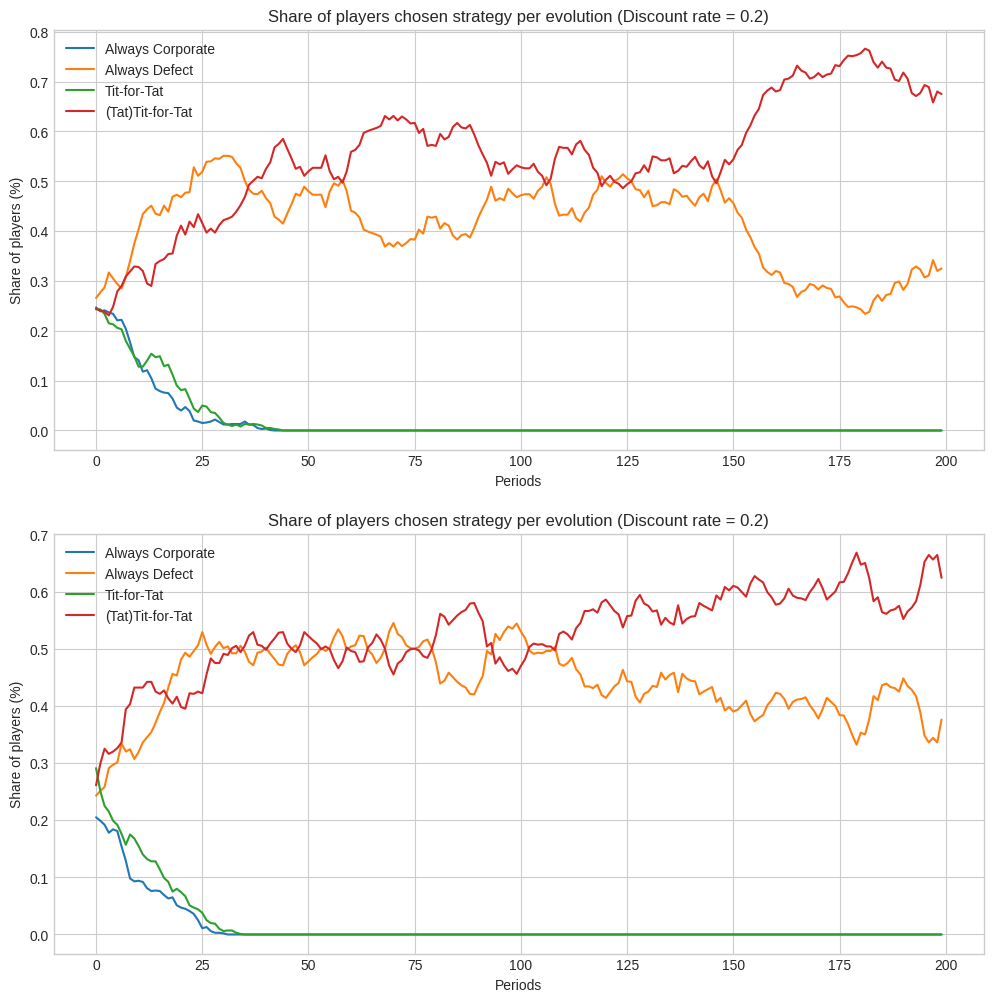

In [ ]:
evolutions, AD1, AC1, TFT1, TTFT1 = evolutionary_process(1000, 200, 0.2, [0,1,2,3])
evolutions, AD2, AC2, TFT2, TTFT2 = evolutionary_process(1000, 200, 0.2, [0,1,2,3])


# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount rate = 0.2)")
plt.plot(evolutions, AC1/1000, label="Always Corporate", color = "black")
plt.plot(evolutions, AD1/1000, label="Always Defect", color = "gray")
plt.plot(evolutions, TFT1/1000, label="Tit-for-Tat",  color = "gray", linestyle = "--")
plt.plot(evolutions, TTFT1/1000, label="(Tat)Tit-for-Tat",color = "black", linestyle = "--")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount rate = 0.2)")
plt.plot(evolutions, AC2/1000, label="Always Corporate", color = "")
plt.plot(evolutions, AD2/1000, label="Always Defect")
plt.plot(evolutions, TFT2/1000, label="Tit-for-Tat")
plt.plot(evolutions, TTFT2/1000, label="(Tat)Tit-for-Tat")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

###### Comment:
Given a lower theta(0.2), different distributions in prefered choice of starting strategy seem to provide different final result of the evolutions. When a major part of the first population starts of by chosing "Always defect", the evolutions seem to be converging towards that strategy. Similar applies for the vice versa when allowing a major part of the population to start of with the "(Tat)Tit-for-Tat" strategy.

#### Evolution Process (Inc. Mutation)
###### 1% mutation: Any strategy can be choosen between

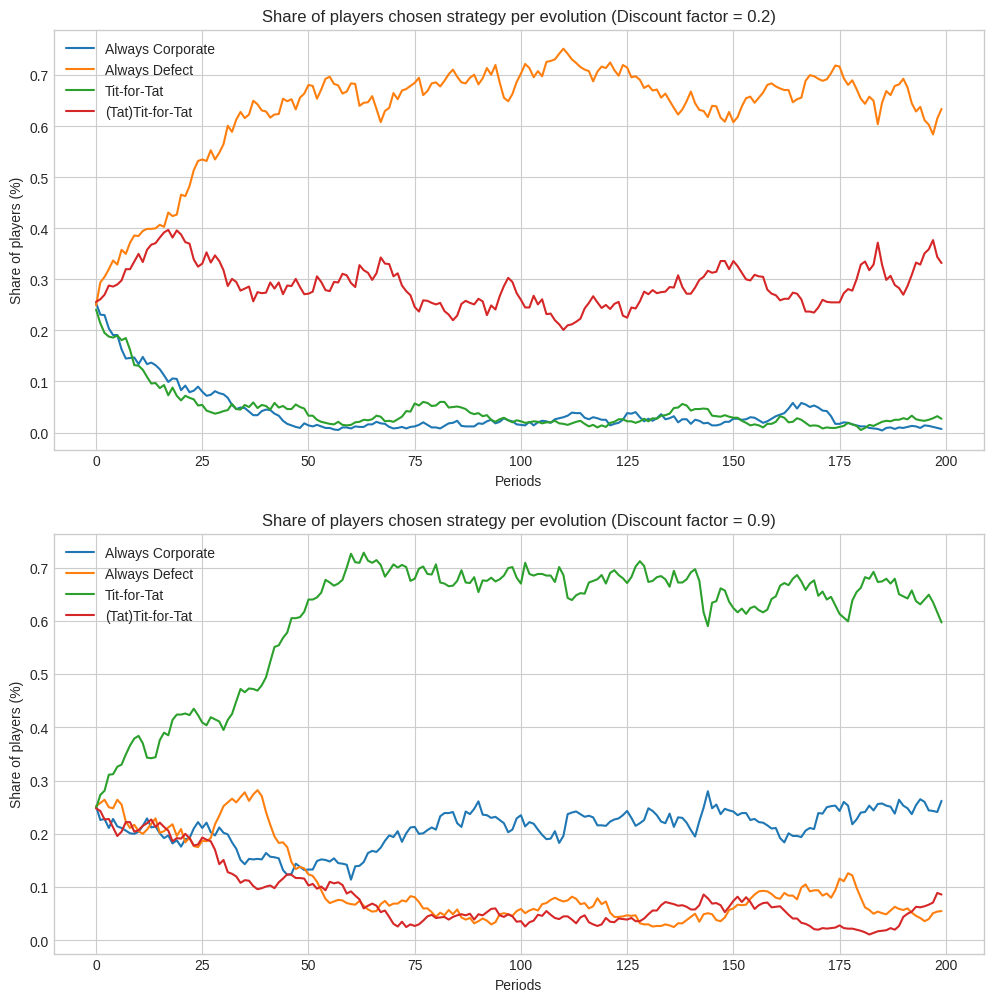

In [ ]:
n_players = 1000
evolutions, AD1, AC1, TFT1, TTFT1 = evolutionary_process(n_players, 200, 0.2, [0,1,2,3], include_mutation=0.01, mutation_strategy=[0,1,2,3])
evolutions, AD2, AC2, TFT2, TTFT2 = evolutionary_process(n_players, 200, 0.9, [0,1,2,3], include_mutation=0.01, mutation_strategy=[0,1,2,3])


# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.2)")
plt.plot(evolutions, AC1/n_players, label="Always Corporate")
plt.plot(evolutions, AD1/n_players, label="Always Defect")
plt.plot(evolutions, TFT1/n_players, label="Tit-for-Tat")
plt.plot(evolutions, TTFT1/n_players, label="(Tat)Tit-for-Tat")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.9)")
plt.plot(evolutions, AC2/n_players, label="Always Corporate")
plt.plot(evolutions, AD2/n_players, label="Always Defect")
plt.plot(evolutions, TFT2/n_players, label="Tit-for-Tat")
plt.plot(evolutions, TTFT2/n_players, label="(Tat)Tit-for-Tat")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

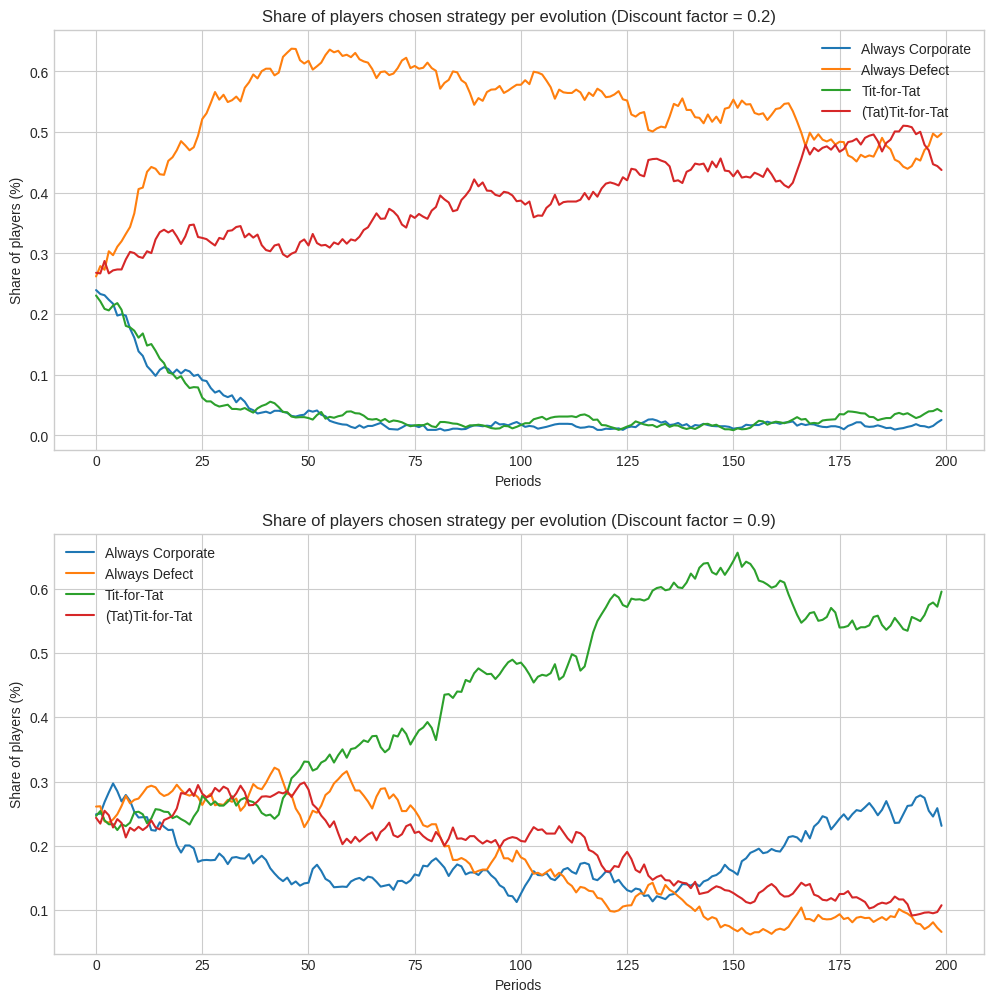

In [ ]:
n_players = 2000
evolutions, AD1, AC1, TFT1, TTFT1 = evolutionary_process(n_players, 200, 0.2, [0,1,2,3], include_mutation=0.01, mutation_strategy=[0,1,2,3])
evolutions, AD2, AC2, TFT2, TTFT2 = evolutionary_process(n_players, 200, 0.9, [0,1,2,3], include_mutation=0.01, mutation_strategy=[0,1,2,3])


# Showcase the result
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.2)")
plt.plot(evolutions, AC1/n_players, label="Always Corporate")
plt.plot(evolutions, AD1/n_players, label="Always Defect")
plt.plot(evolutions, TFT1/n_players, label="Tit-for-Tat")
plt.plot(evolutions, TTFT1/n_players, label="(Tat)Tit-for-Tat")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()

plt.subplot(212)
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.9)")
plt.plot(evolutions, AC2/n_players, label="Always Corporate")
plt.plot(evolutions, AD2/n_players, label="Always Defect")
plt.plot(evolutions, TFT2/n_players, label="Tit-for-Tat")
plt.plot(evolutions, TTFT2/n_players, label="(Tat)Tit-for-Tat")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

###### Comment:
When we introducing the mutation, where each generation of mutation can choose from any strategy, we experience more variation in the result. Which strategy that will become the leading choice seems to tend towards the same ones of the similar experiment when we excluded the mutations.

___
###### 1% mutations(Large-Scale!): Allowing the mutations to introduce the Tit-for-Tat & (Tat)Tit-for-Tat strategies.

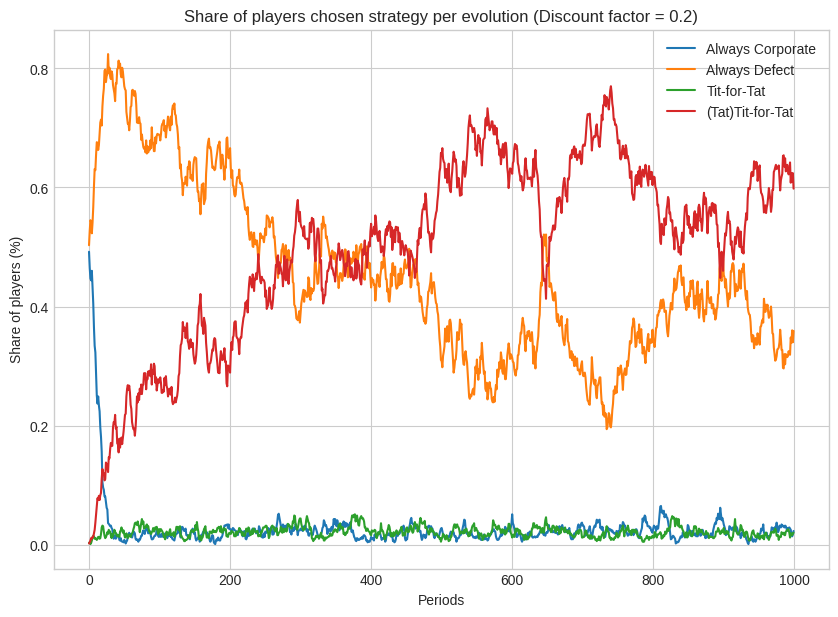

In [ ]:
evolutions, AD1, AC1, TFT1, TTFT1 = evolutionary_process(1000, 1000, 0.2, [0,1], include_mutation=0.01, mutation_strategy=[0,1,2,3])

# Showcase the result
plt.figure(figsize=(10,7))
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.2)")
plt.plot(evolutions, AC1/1000, label="Always Corporate")
plt.plot(evolutions, AD1/1000, label="Always Defect")
plt.plot(evolutions, TFT1/1000, label="Tit-for-Tat")
plt.plot(evolutions, TTFT1/1000, label="(Tat)Tit-for-Tat")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

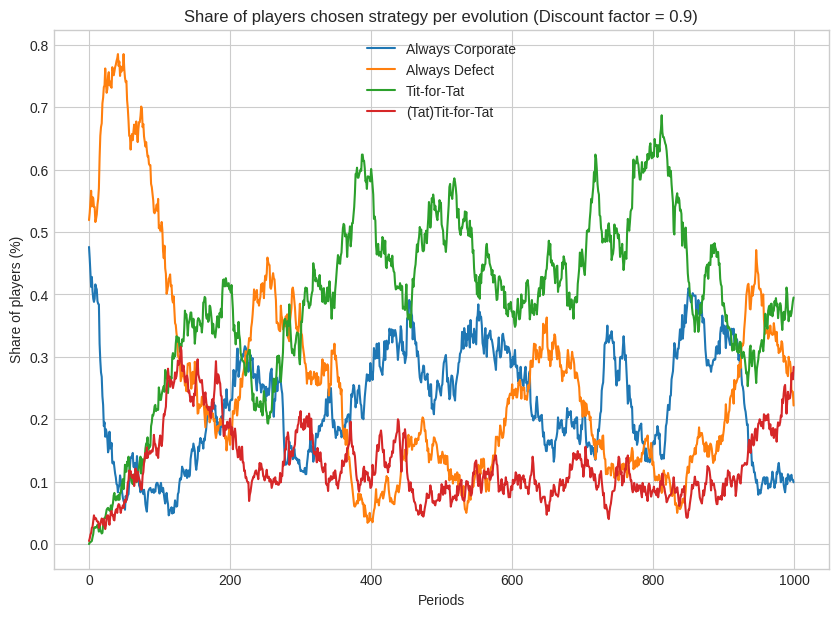

In [ ]:
evolutions, AD2, AC2, TFT2, TTFT2 = evolutionary_process(1000, 1000, 0.9, [0,1], include_mutation=0.01, mutation_strategy=[0,1,2,3])


# Showcase the result
plt.figure(figsize=(10,7))
plt.title("Share of players chosen strategy per evolution (Discount factor = 0.9)")
plt.plot(evolutions, AC2/1000, label="Always Corporate")
plt.plot(evolutions, AD2/1000, label="Always Defect")
plt.plot(evolutions, TFT2/1000, label="Tit-for-Tat")
plt.plot(evolutions, TTFT2/1000, label="(Tat)Tit-for-Tat")
plt.xlabel("Periods")
plt.ylabel("Share of players (%)")
plt.legend()
plt.show()

###### Comment:
Here we seperate the two due to processing limitation given the mere size of the experiment. However, the result we see is that if the starting population can only choose from "always defect" and "always corporate", and we make such that the mutations introduces the Tit-for-Tat & (Tat)Tit-for-Tat strategies it becomes an intersting evolution process. Essentially what we are seeing is that for the lower theta, the (Tat)Tit-for-Tat strategy gains momentum in the begining and then it is varying in popualrtiy between that one and the always defect strategy. However, when the theta is high, its less clear which strategy is preferable. We see in the beginning that the Tit-for-Tat gains momentum and both the always defect and always coporate falls quickly. This result is most likely due to the decreasing value of the first games results from each match given that more games are runned for each evolution and pair.

___
**Group Members:** Christoffer, Mika, Oliver, Yulin